# Project Phase II: Raquel Castromonte

2018 - 2019 Students in Temporary Housing School Level Report

Data catalog: https://catalog.data.gov/dataset/2018-2019-students-in-temporary-housing-school-level-report
Database found on: https://data.cityofnewyork.us/Education/2018-2019-Students-in-Temporary-Housing-School-Lev/8iee-pzu6

Possible question this might answer: Differences in student housing per borough

In [1]:
## load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#load data
housing_data = pd.read_csv("2018_-_2019_Students_in_Temporary_Housing_School_Level_Report.csv")

In [3]:
housing_data.head()

,DBN,School Name,# Total Students,# Students in Temporary Housing,% Students in Temporary Housing,# Students Residing in Shelter,# Residing in DHS Shelter,# Residing in Non-DHS Shelter,# Doubled Up
0,01M015,P.S. 015 Roberto Clemente,187,67,0.36,16,6,10,49
1,01M019,P.S. 019 Asher Levy,274,34,0.12,19,s,s,15
2,01M020,P.S. 020 Anna Silver,512,95,0.19,41,26,15,51
3,01M034,P.S. 034 Franklin D. Roosevelt,348,84,0.24,46,34,12,38
4,01M063,The STAR Academy - P.S.63,212,52,0.25,13,s,s,37


#create a new column named "Boroughs" and extract the borough from the letter in the column "DBN" 
housing_data["Borough"] = np.nan
for i in range(len(housing_data["DBN"])):
    district_number = housing_data['DBN'][0:2]
    hi = housing_data.loc[i]
    letter =  hi["DBN"][2]
    if letter == "M":
        housing_data["Borough"][i] = "Manhattan" + district_number
    elif letter == "X":
        housing_data["Borough"][i] = "Bronx" + district_number
    elif letter == "Q":
        housing_data["Borough"][i] = "Queens" + district_number
    elif letter == "K":
        housing_data["Borough"][i] = "Brooklyn" + district_number
    elif letter == "R":
        housing_data["Borough"][i] = "Staten_Island" + district_number

In [4]:
def label_borough(col):
    district_number = col['DBN'][0:2]
    if col['DBN'].find("M") == 2:
      return 'Manhattan ' + district_number
    if col['DBN'].find("K") == 2:
      return 'Brooklyn ' + district_number
    if col['DBN'].find("X") == 2 :
      return 'Bronx ' + district_number
    if col['DBN'].find("Q") == 2:
      return 'Queens ' + district_number
    if col['DBN'].find("R") == 2:
      return 'Staten Island ' + district_number

def labelBorough(col):
    if col['DBN'].find("M") == 2:
      return 'Manhattan'
    if col['DBN'].find("K") == 2:
      return 'Brooklyn'
    if col['DBN'].find("X") == 2 :
      return 'Bronx'
    if col['DBN'].find("Q") == 2:
      return 'Queens'
    if col['DBN'].find("R") == 2:
      return 'Staten Island'


housing_data['borough_and_district_#'] = housing_data.apply(lambda col: label_borough(col), axis=1)
housing_data["borough"] = housing_data.apply(lambda col: labelBorough(col), axis=1)

In [5]:
housing_data["borough_and_district_#"].unique()
housing_data["borough"].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [6]:
#delete columns that we will not use
housing_data = housing_data.drop(['DBN', 'School Name','# Doubled Up'], axis = 1)

In [7]:
#check the data types of each column
housing_data.dtypes

# Total Students                    int64
# Students in Temporary Housing    object
% Students in Temporary Housing    object
# Students Residing in Shelter     object
# Residing in DHS Shelter          object
# Residing in Non-DHS Shelter      object
borough_and_district_#             object
borough                            object
dtype: object

In [8]:
housing_data.columns

Index(['# Total Students', '# Students in Temporary Housing',
       '% Students in Temporary Housing', '# Students Residing in Shelter',
       '# Residing in DHS Shelter', '# Residing in Non-DHS Shelter',
       'borough_and_district_#', 'borough'],
      dtype='object')

In [9]:
housing_data["borough_and_district_#"].unique()

array(['Manhattan 01', 'Manhattan 02', 'Brooklyn 22', 'Manhattan 03',
       'Queens 24', 'Manhattan 04', 'Bronx 12', 'Manhattan 05',
       'Manhattan 06', 'Bronx 07', 'Manhattan 75', 'Bronx 08', 'Bronx 09',
       'Bronx 10', 'Bronx 11', 'Brooklyn 13', 'Brooklyn 14',
       'Brooklyn 15', 'Brooklyn 16', 'Brooklyn 17', 'Brooklyn 18',
       'Brooklyn 19', 'Brooklyn 20', 'Brooklyn 21', 'Brooklyn 23',
       'Queens 25', 'Queens 26', 'Queens 27', 'Queens 28', 'Queens 29',
       'Staten Island 31', 'Queens 30', 'Brooklyn 32', 'Brooklyn 75',
       'Queens 75', 'Staten Island 75', 'Bronx 75', 'Manhattan 79',
       'Queens 79', 'Bronx 79'], dtype=object)

In [10]:
#replace the s in the rows to 0
housing_data = housing_data.replace("s", 0)

#change the 0 object to int in integer columns
housing_data["# Students in Temporary Housing"] = housing_data["# Students in Temporary Housing"].astype(int)
housing_data["% Students in Temporary Housing"] = housing_data["% Students in Temporary Housing"].astype(float)
housing_data["# Students Residing in Shelter"] = housing_data["# Students Residing in Shelter"].astype(int)
housing_data["# Residing in DHS Shelter"] = housing_data["# Residing in DHS Shelter"].astype(int)
housing_data["# Residing in Non-DHS Shelter"] = housing_data["# Residing in Non-DHS Shelter"].astype(int)

In [11]:
#proof
housing_data.dtypes

# Total Students                     int64
# Students in Temporary Housing      int32
% Students in Temporary Housing    float64
# Students Residing in Shelter       int32
# Residing in DHS Shelter            int32
# Residing in Non-DHS Shelter        int32
borough_and_district_#              object
borough                             object
dtype: object

In [12]:
housing_data["borough_and_district_#"].unique()

array(['Manhattan 01', 'Manhattan 02', 'Brooklyn 22', 'Manhattan 03',
       'Queens 24', 'Manhattan 04', 'Bronx 12', 'Manhattan 05',
       'Manhattan 06', 'Bronx 07', 'Manhattan 75', 'Bronx 08', 'Bronx 09',
       'Bronx 10', 'Bronx 11', 'Brooklyn 13', 'Brooklyn 14',
       'Brooklyn 15', 'Brooklyn 16', 'Brooklyn 17', 'Brooklyn 18',
       'Brooklyn 19', 'Brooklyn 20', 'Brooklyn 21', 'Brooklyn 23',
       'Queens 25', 'Queens 26', 'Queens 27', 'Queens 28', 'Queens 29',
       'Staten Island 31', 'Queens 30', 'Brooklyn 32', 'Brooklyn 75',
       'Queens 75', 'Staten Island 75', 'Bronx 75', 'Manhattan 79',
       'Queens 79', 'Bronx 79'], dtype=object)

In [13]:
#gruop_by Borough and neighborhood
by_borough_and_neigh = housing_data.groupby("borough_and_district_#")

In [14]:
by_borough = housing_data.groupby("borough")

In [24]:
#total number of students in the city according to the data
print("There are {} number of students in NYC. \n There are {} students in the Bronx,\n {} in Brooklyn,\n {} in Manhattan,\n{} in Queens,\n and {} in Staten Island".format(
    by_borough.sum()["# Total Students"].sum(), 
    by_borough.sum()["# Total Students"].loc["Bronx"], 
    by_borough.sum()["# Total Students"].loc["Brooklyn"], 
    by_borough.sum()["# Total Students"].loc["Manhattan"],
    by_borough.sum()["# Total Students"].loc["Queens"],
    by_borough.sum()["# Total Students"].loc["Staten Island"]
))

There are borough
Bronx            220465
Brooklyn         306370
Manhattan        155456
Queens           315063
Staten Island     66502
Name: # Total Students, dtype: int64 number of students in NYC. 
 There are 220465 students in the Bronx,
 306370 in Brooklyn,
 155456 in Manhattan,
315063 in Queens,
 and 66502 in Staten Island


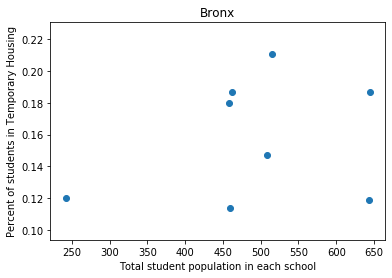

In [23]:
#get a scatter plot of the different neighborhoods in bronx
by_bronx = housing_data.loc[housing_data["borough"] == "Bronx"]
le_bronx = by_bronx.groupby("borough_and_district_#").mean()
plt.scatter(le_bronx["# Total Students"], le_bronx["% Students in Temporary Housing"])#, labels = "borough_and_district_#")
plt.xlabel("Total student population in each school")
plt.ylabel("Percent of students in Temporary Housing")
plt.title("Bronx")
plt.show()

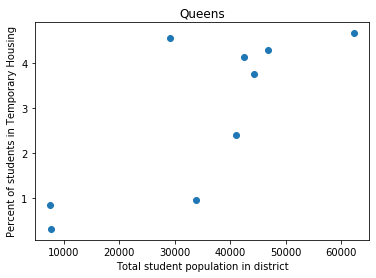

In [17]:
#get a scatter plot of the different neighborhoods in queens
by_queens = housing_data.loc[housing_data["borough"] == "Queens"]
le_queens = by_queens.groupby("borough_and_district_#").sum()
plt.scatter(le_queens["# Total Students"], le_queens["% Students in Temporary Housing"])
plt.xlabel("Total student population in district")
plt.ylabel("Percent of students in Temporary Housing")
plt.title("Queens")
plt.show()

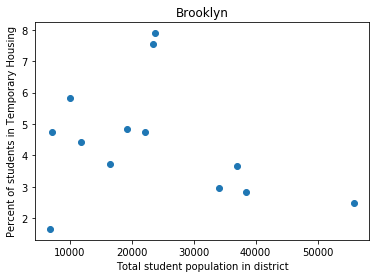

In [18]:
#get a scatter plot of the different neighborhoods in Brooklyn
by_brooklyn = housing_data.loc[housing_data["borough"] == "Brooklyn"]
le_brooklyn = by_brooklyn.groupby("borough_and_district_#").sum()
plt.scatter(le_brooklyn["# Total Students"], le_brooklyn["% Students in Temporary Housing"])
plt.xlabel("Total student population in district")
plt.ylabel("Percent of students in Temporary Housing")
plt.title("Brooklyn")
plt.show()

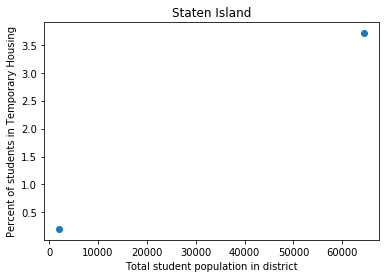

In [19]:
#get a scatter plot of the different neighborhoods in Staten Island
by_SI = housing_data.loc[housing_data["borough"] == "Staten Island"]
le_SI = by_SI.groupby("borough_and_district_#").sum()
plt.scatter(le_SI["# Total Students"], le_SI["% Students in Temporary Housing"])
plt.xlabel("Total student population in district")
plt.ylabel("Percent of students in Temporary Housing")
plt.title("Staten Island")
plt.show()

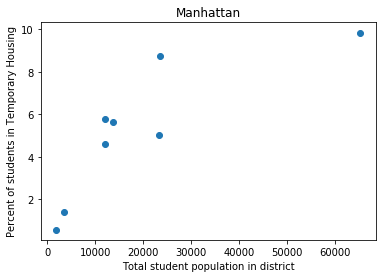

In [20]:
#get a scatter plot of the different neighborhoods in Manhattan
by_man = housing_data.loc[housing_data["borough"] == "Manhattan"]
le_man = by_man.groupby("borough_and_district_#").sum()
plt.scatter(le_man["# Total Students"], le_man["% Students in Temporary Housing"])
plt.xlabel("Total student population in district")
plt.ylabel("Percent of students in Temporary Housing")
plt.title("Manhattan")
plt.show()